## Student Performance indicator
ML Project life cycle:
- Understanding problem statement
- Data Collection
- Data Validation
- EDA
- Data Pre-Processing
- Model Training
- Model Optimizing
- Choosing best Model






## 1- Understanding Problem Statement
- This project aims to understand how Gender, Ethnicity, Parental level of education, Lunch & Test Preperation affect student performance "Test Score"


## 2- Data Collection
- This project data soruce if Kaggle - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

### 2.1- Importing data and required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/student.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#Shape of Dataset
df.shape

(1000, 8)

### 2.2- Dataset information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## 3- Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [4]:
#3.1- Checking Missing Values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
count = 0
for col in df.columns:
    for x in df[col]:
        if x in ['Missing','NA',np.nan,0]:
            count = count +1
count 
#Checking Written missing values

1

In [11]:
count = []
for col in df.columns:
    for x in df[col]:
        if x in ['Missing','NA',np.nan,0]:
            print(col)
#Hmmm looks like the 0 is in an exam not an actual error

math_score


In [12]:
#3.2- Checking duplicates
df[df.duplicated()]

#There are no duplicated observations in this dataset

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


In [14]:
#3.3- Checking data types
df.dtypes
#Based on the data information we have, it seems that the data are in the correct format

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [16]:
#3.4- Checking the number of unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [28]:
#3.5 Checking on Numerical & Catgorical Features
num = [col for col in df.columns if df[col].dtype !='O']
cat = [col for col in df.columns if df[col].dtype =='O']
print(f'We have {len(num)} Numerical Features: {num}')
print(f'We have {len(cat)} Categorical Features: {cat}')

We have 3 Numerical Features: ['math_score', 'reading_score', 'writing_score']
We have 5 Numerical Features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [43]:
#3.5.1 Basic Statistics of dataset (Numerical Columns only)
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')


reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

df.describe()

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17
Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


,math_score,reading_score,writing_score,total_score,average
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


From the basic statistics above we can see that: 
- Every observation have an exam score (1000/1000)
- Mean of the 3 scores are close to each other 66-69, with the math score having the lowest mean
- Only Math_score have a minimum value of 0 < minimum value of writing score of 10 < minimum value of reading score 17

In [30]:
#3.5.2 Checking on categorical columns
for col in cat:
    print(f'Categories in {col}: ',df[col].unique(),'\n\n')

Categories in gender:  ['female' 'male'] 


Categories in race_ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E'] 


Categories in parental_level_of_education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 


Categories in lunch:  ['standard' 'free/reduced'] 


Categories in test_preparation_course:  ['none' 'completed'] 




It Seems that our numerical features math_score, writing_score & reading_score will be our dependent variables "Target Variables", so Let's combine the 3 of them into a single value that we can try to predict, we will do this using: 
- total_score 
- average_score

In [42]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## 4- EDA

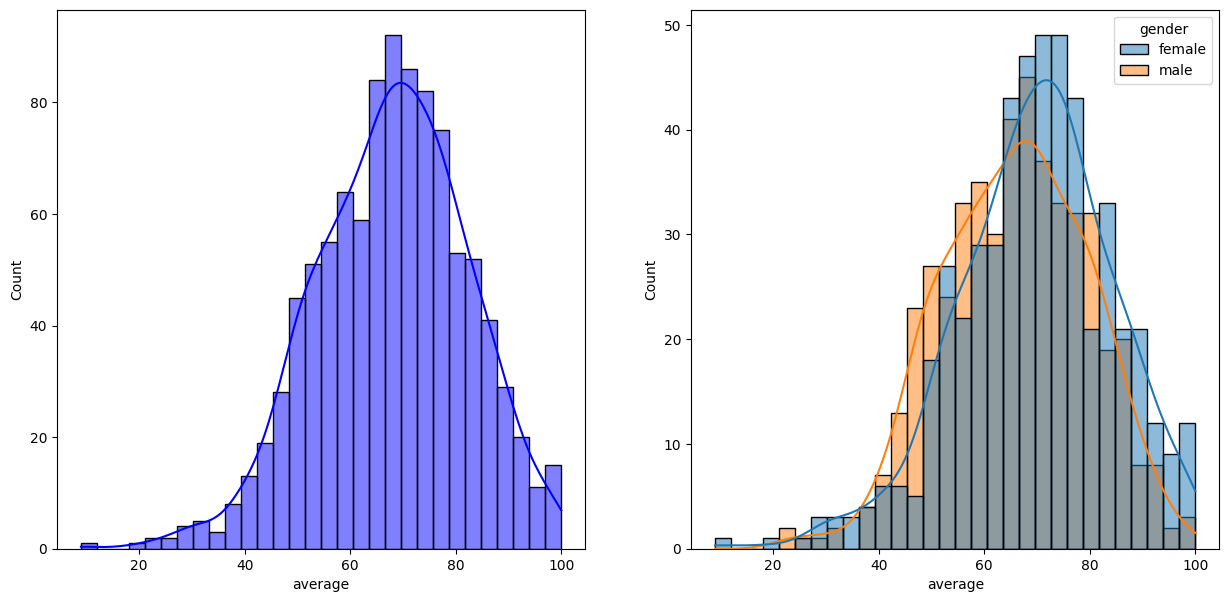

In [60]:
#4.1- Visualize average & total scores according to different features to see how they affect them
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True,bins=30,color='b')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,bins=30,hue='gender')
plt.show()


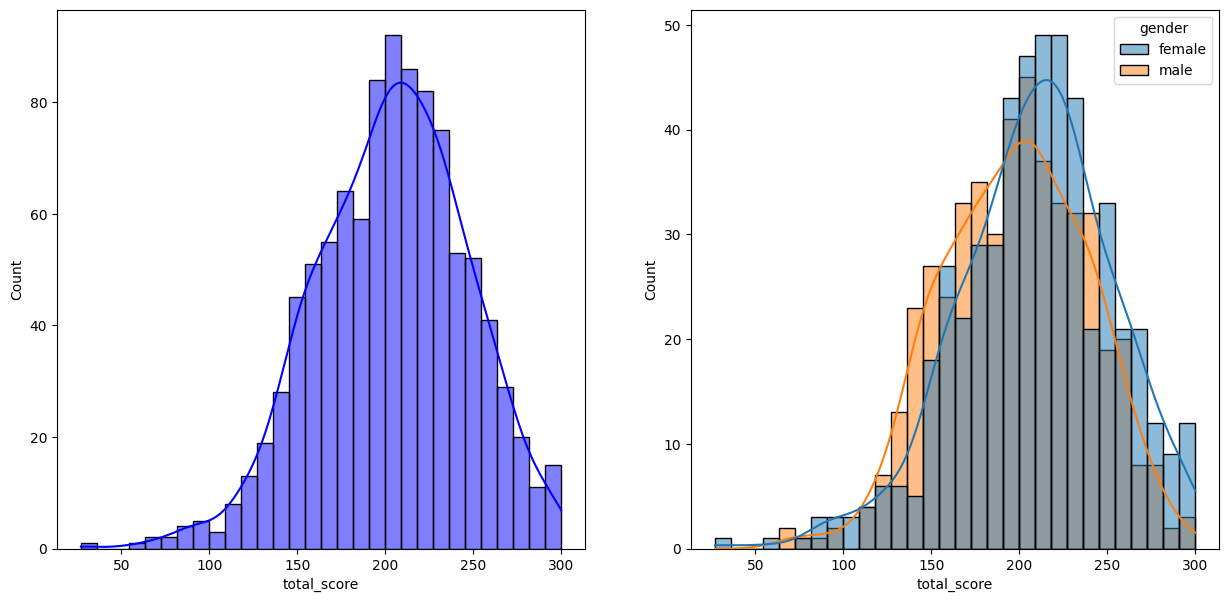

In [59]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(x='total_score',data=df,kde=True,bins=30,color='b')
plt.subplot(122)
sns.histplot(x='total_score',data=df,kde=True,bins=30,hue='gender')
plt.show()

It seems that Females perform better than males in exams

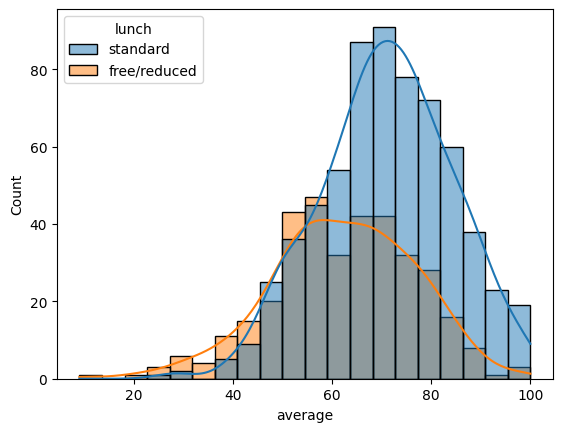

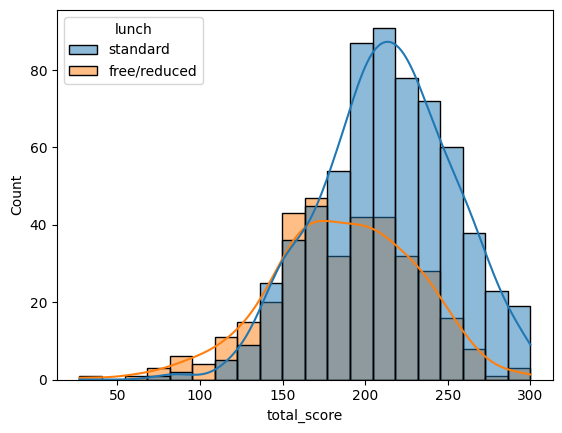

In [61]:
scores= ['average','total_score']
for score in scores:
    sns.histplot(data=df,x=score,bins=20,kde=True,hue='lunch')
    plt.show()

It seems that having lunch help students score better in the exam

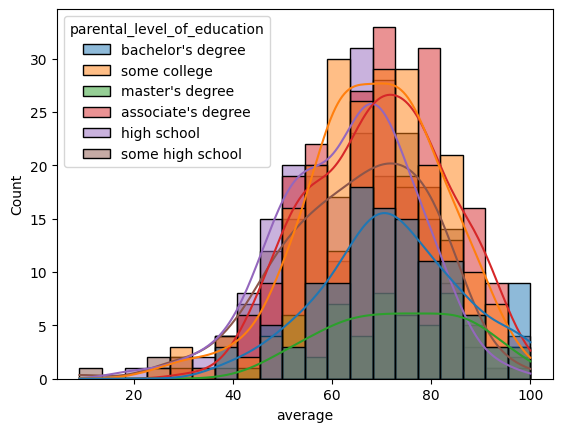

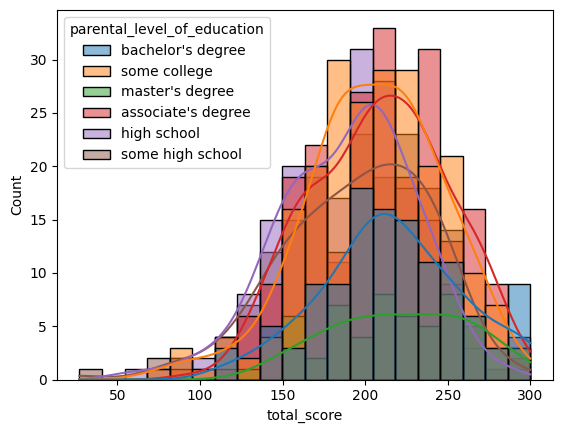

In [63]:
scores= ['average','total_score']
for score in scores:
    sns.histplot(data=df,x=score,bins=20,kde=True,hue='parental_level_of_education')
    plt.show()

It seems that parental level of education affect the student scores in different ways

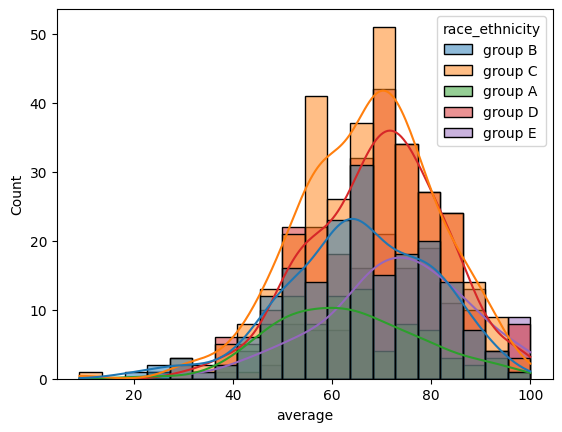

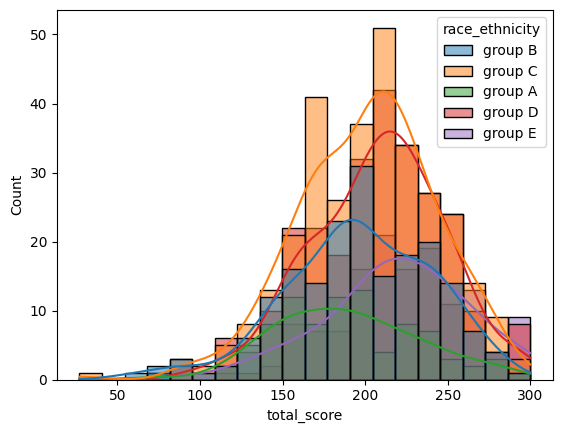

In [66]:
scores= ['average','total_score']
for score in scores:
    sns.histplot(data=df,x=score,bins=20,kde=True,hue='race_ethnicity')
    plt.show()

Group A & E tends to do worse on exams
Group C & D Tends to preform better on exams

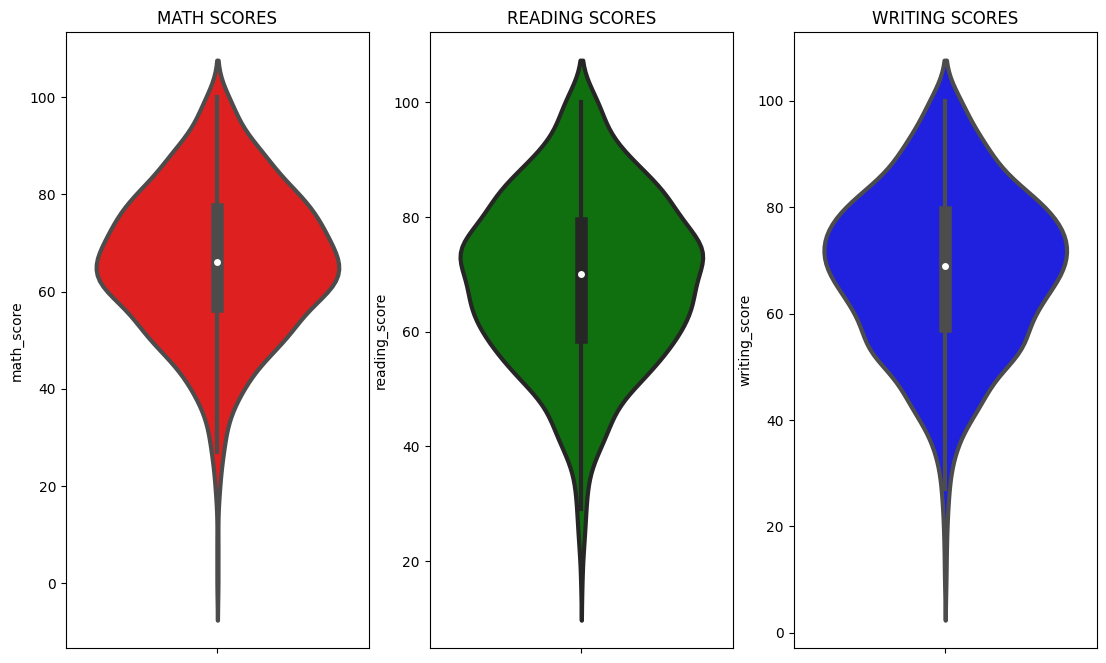

In [69]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

It seems that students perform better in reading & writing than in math

Text(0.5, 1.0, 'Gender')

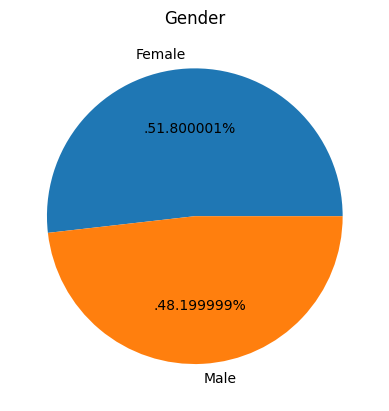

In [81]:
plt.pie(df['gender'].value_counts(),labels=['Female','Male'],autopct='.%1f%%')
plt.title('Gender')

<Axes: xlabel='lunch', ylabel='writing_score'>

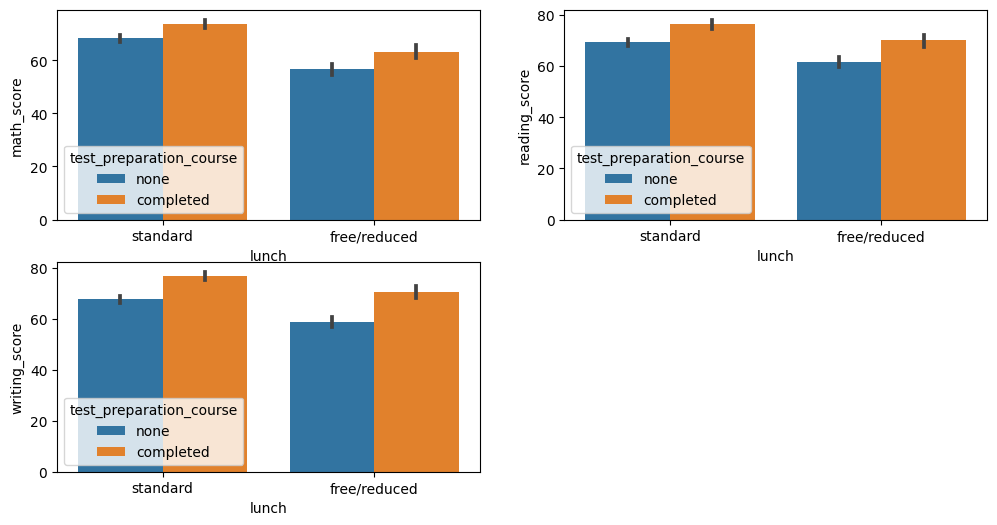

In [86]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
#Bivariate analysis using both Lunch & test_preperation to see their affect on scores

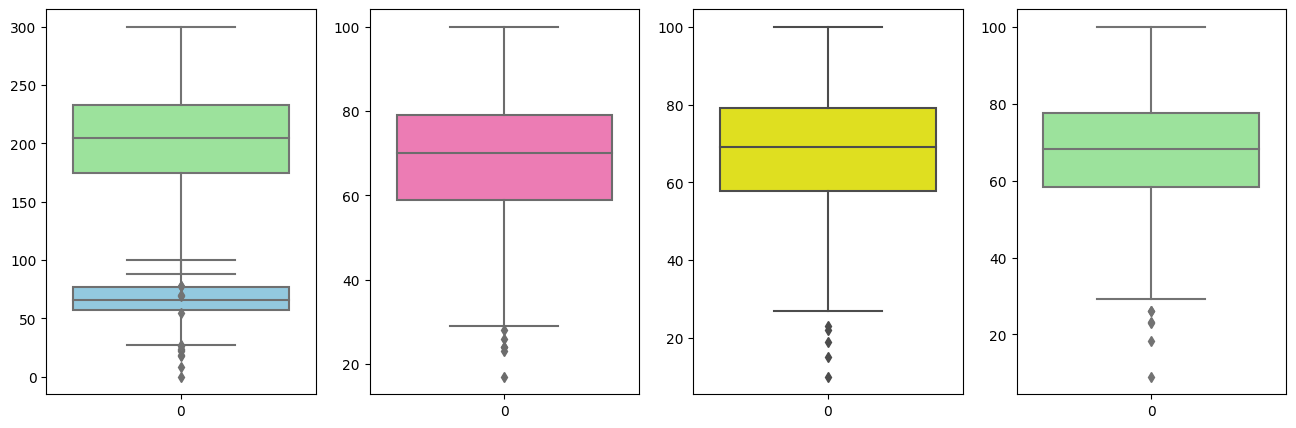

In [93]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()
#Checking Outliers


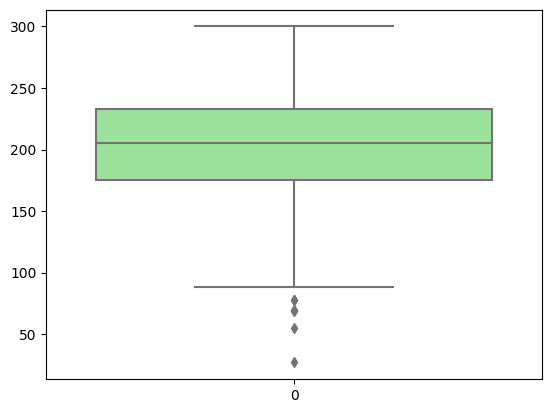

In [94]:
sns.boxplot(df['total_score'],color='lightgreen')
plt.show()
#Checking Outliers

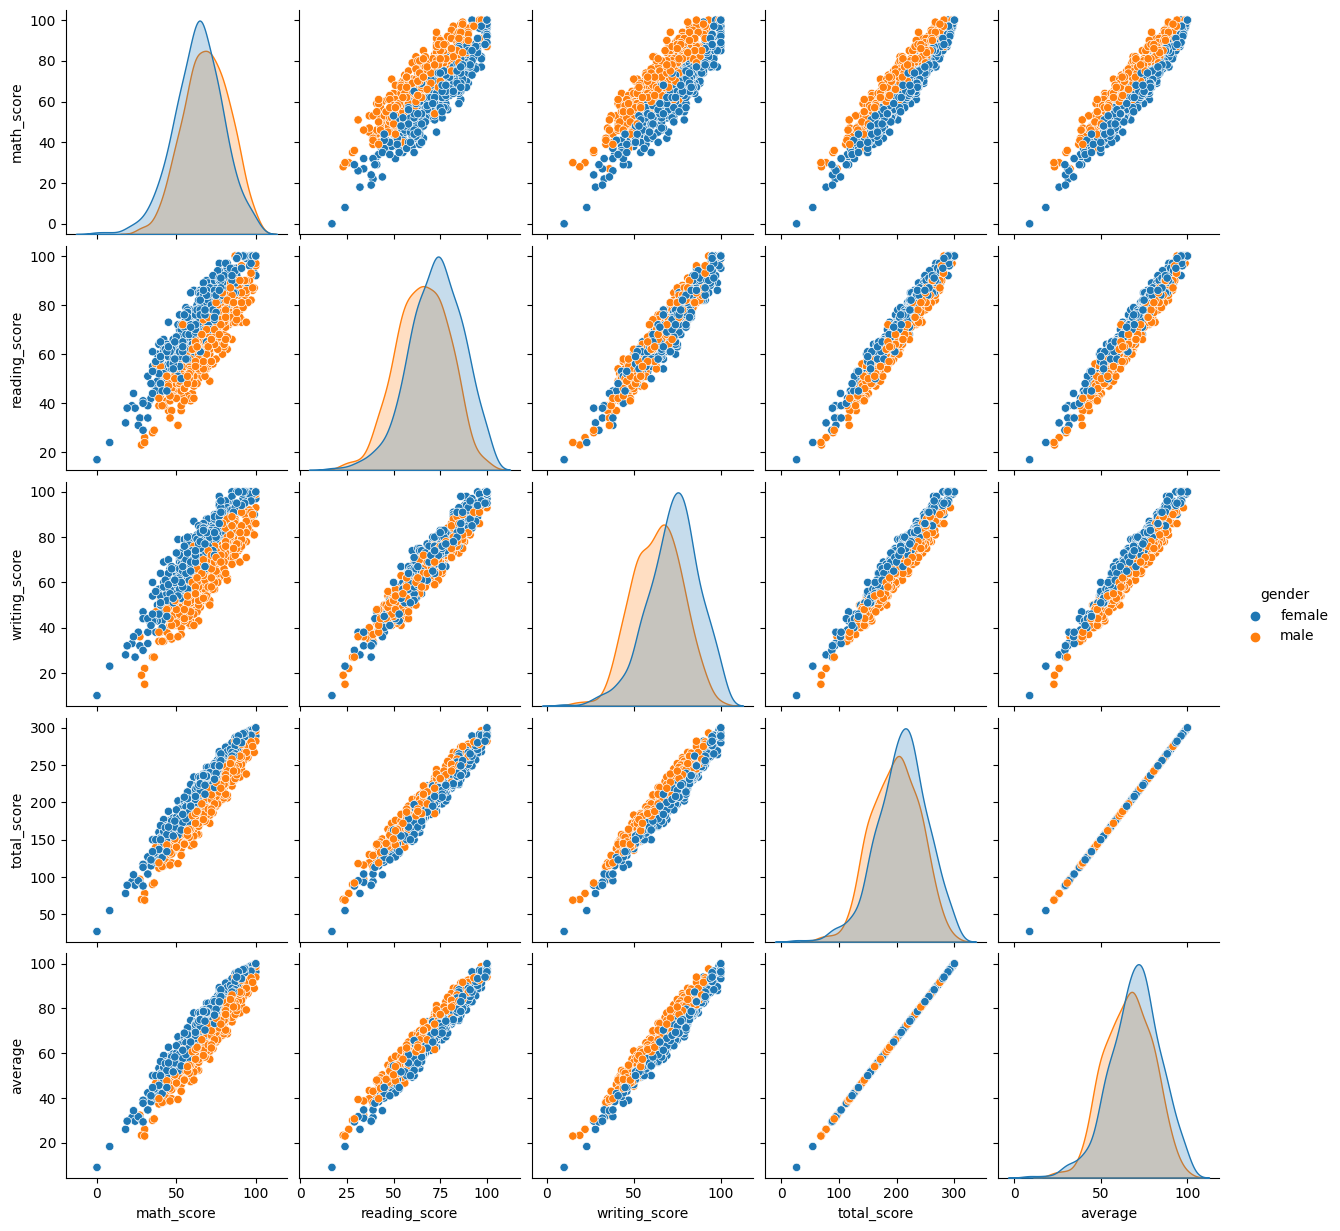

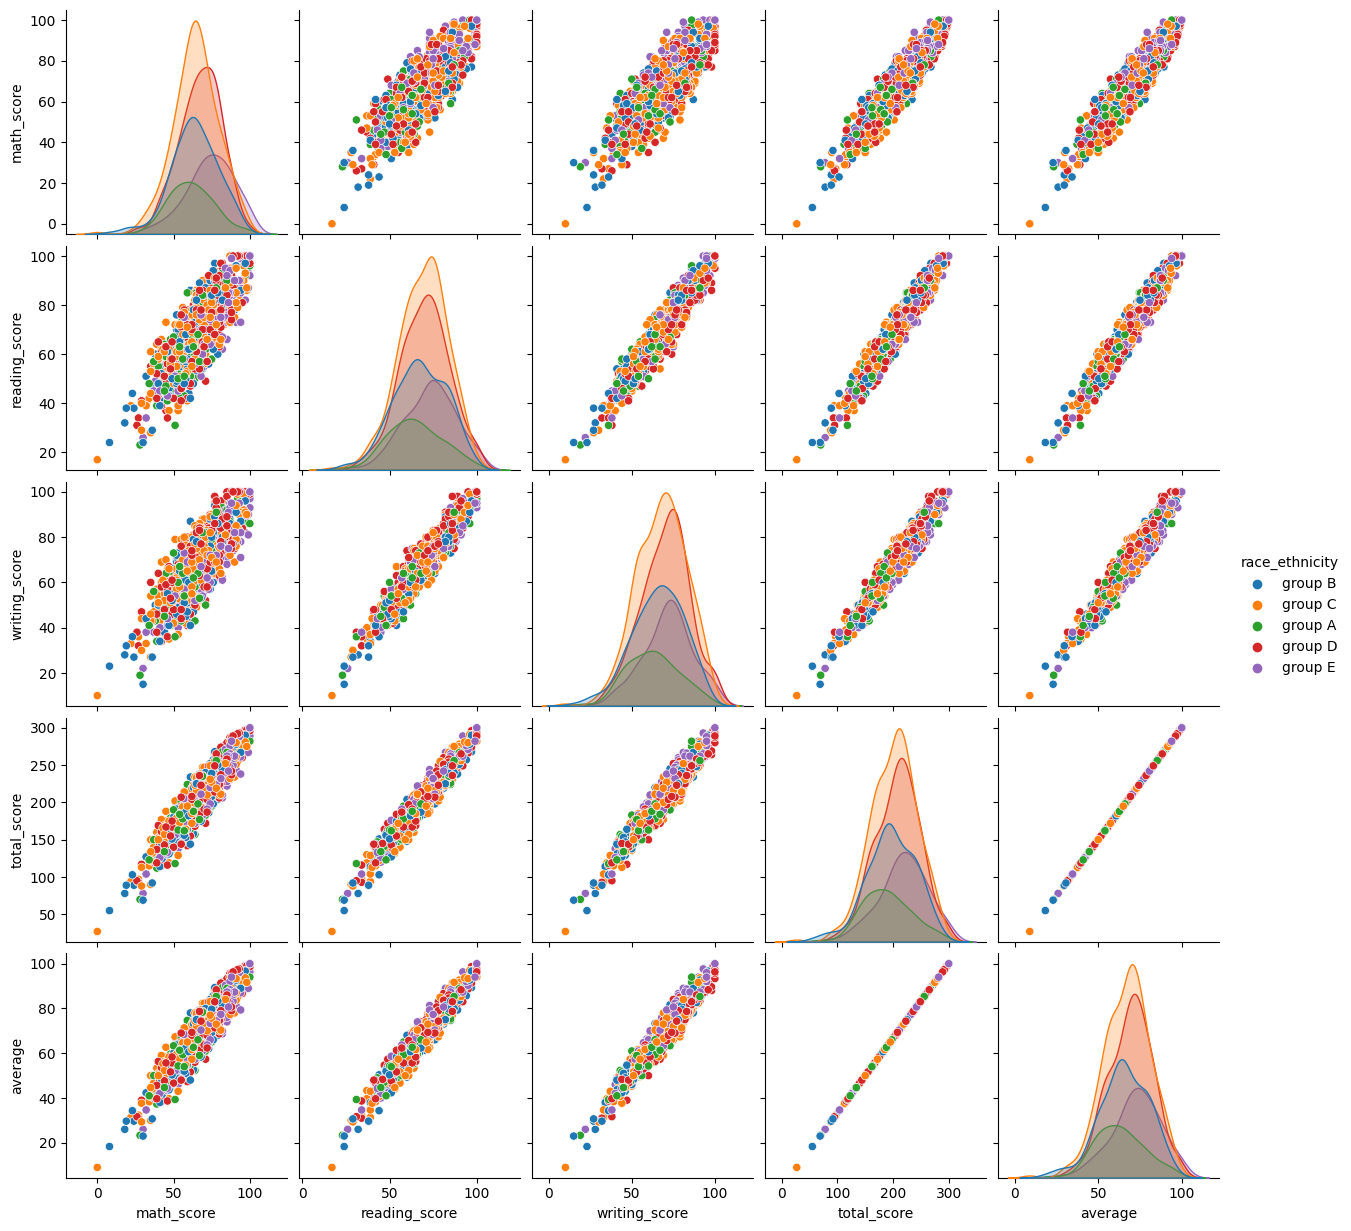

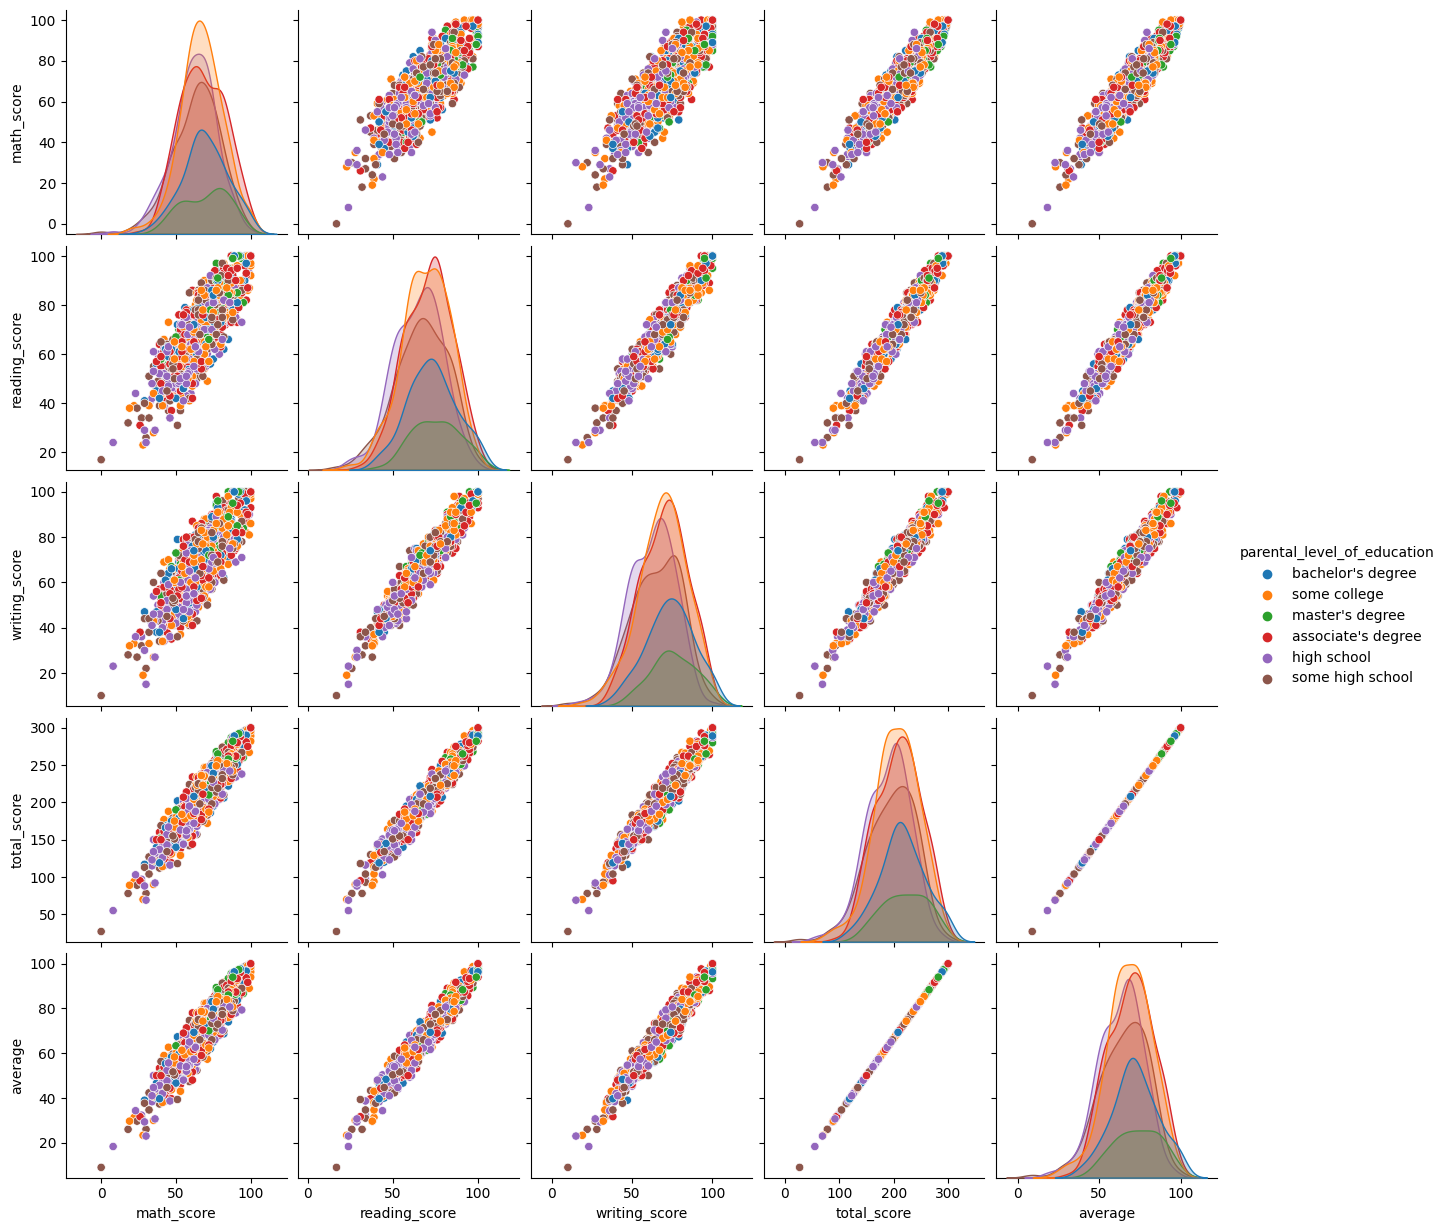

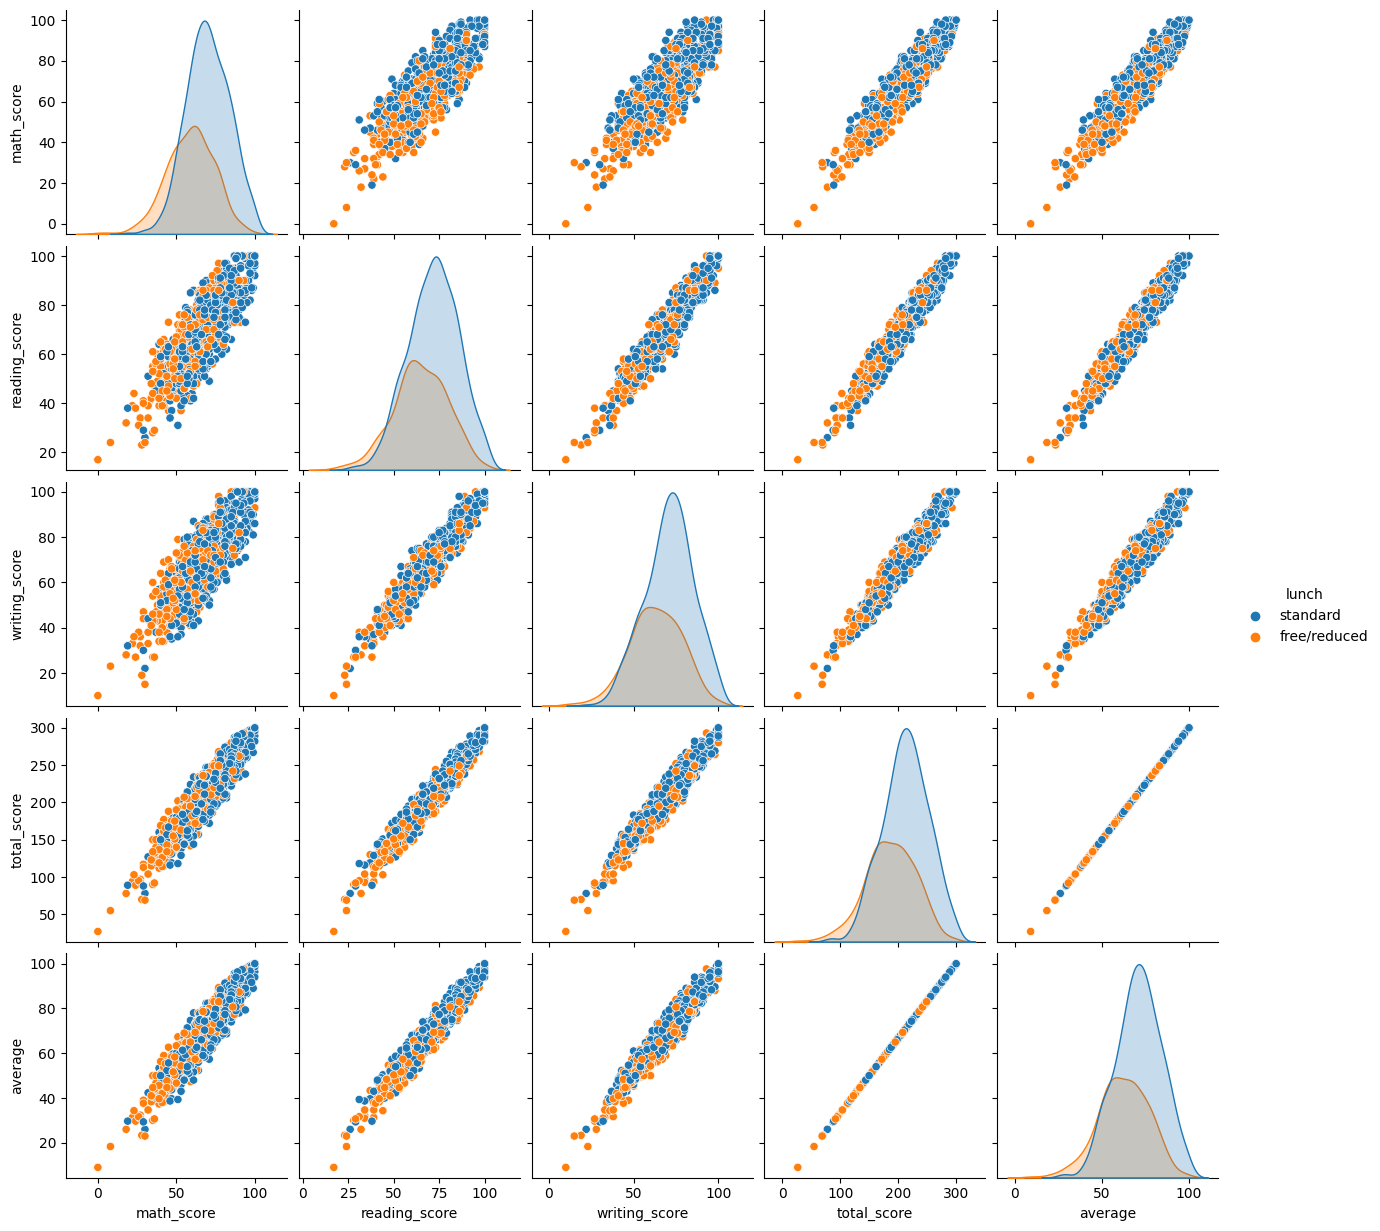

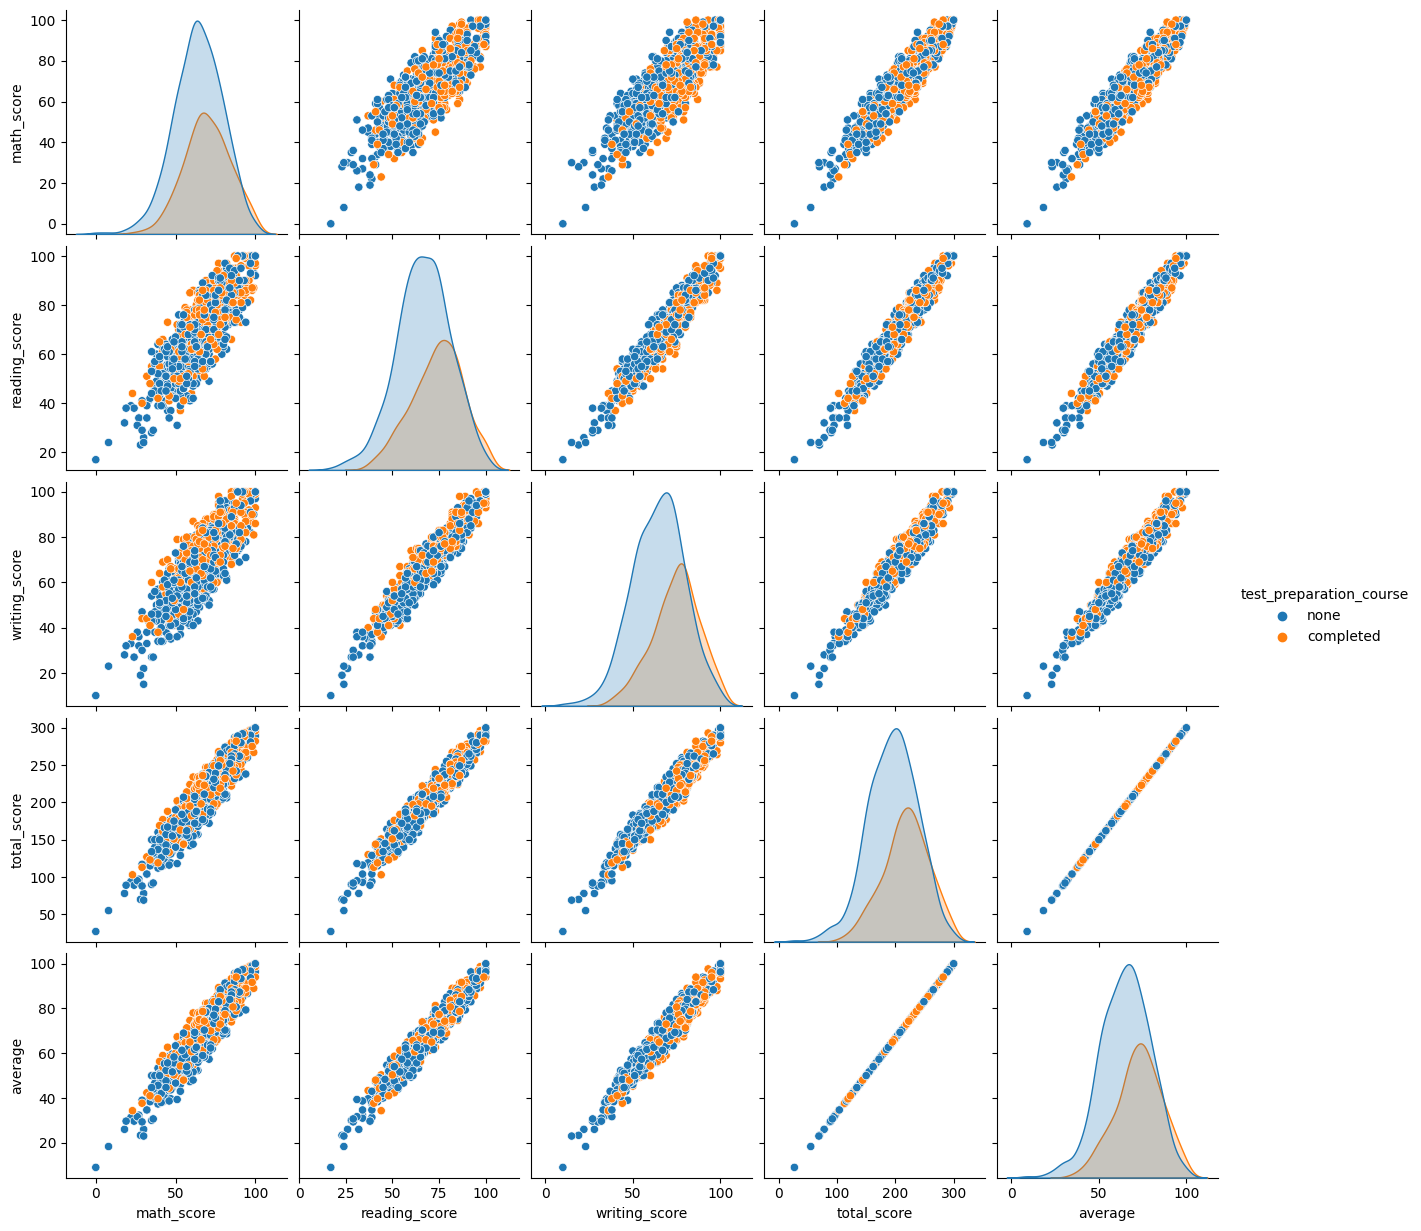

In [83]:
for col in cat:
    sns.pairplot(df,hue = col)
    plt.show()

Total and Average scores are based on the 3 test scores so it's obvious that they would have a linear relation between them, but it's now also obvious that each individual score have a linear relation with each other

## 5- Conclusion
- Female students tends to perform better than Male students
- Having a good score in 1 exam likely means that you will have good scores in other exams
- Having Lunch have a positive effect on exam scores
- Race & parental level of education both affect exam scores